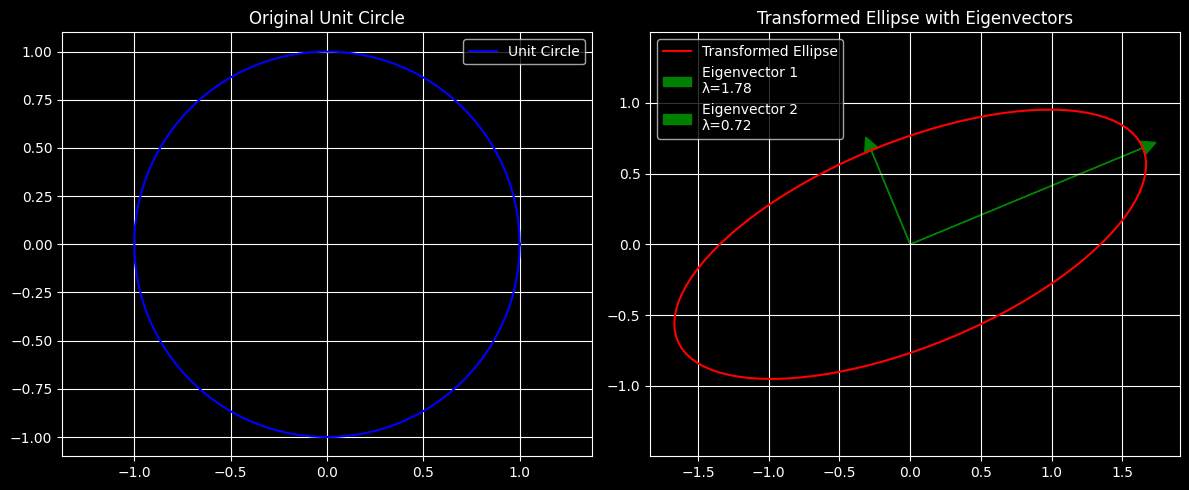

Eigenvalues (radii of major and minor axes): [1.78033009 0.71966991]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_circle_points(num_points=100):
    """Generate points on a unit circle."""
    theta = np.linspace(0, 2*np.pi, num_points)
    x = np.cos(theta)
    y = np.sin(theta)
    return np.vstack((x, y))

def transform_points(points, matrix):
    """Apply matrix transformation to points."""
    return np.dot(matrix, points)

def plot_transformation():
    # Generate points on unit circle
    circle_points = generate_circle_points()
    
    # Define transformation matrix A
    # This example uses a matrix with eigenvalues 2 and 0.5
    A = np.array([[1.625, 0.375],
                  [0.375, 0.875]])
    
    # Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    # Transform circle points
    transformed_points = transform_points(circle_points, A)
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot original circle
    ax1.plot(circle_points[0], circle_points[1], 'b-', label='Unit Circle')
    ax1.grid(True)
    ax1.axis('equal')
    ax1.set_title('Original Unit Circle')
    ax1.legend()
    
    # Plot transformed ellipse
    ax2.plot(transformed_points[0], transformed_points[1], 'r-', label='Transformed Ellipse')
    
    # Plot eigenvectors scaled by eigenvalues
    for i in range(2):
        scaled_eigenvector = eigenvalues[i] * eigenvectors[:, i]
        ax2.arrow(0, 0, scaled_eigenvector[0], scaled_eigenvector[1],
                 head_width=0.1, head_length=0.1, fc='g', ec='g',
                 label=f'Eigenvector {i+1}\nλ={eigenvalues[i]:.2f}')
    
    ax2.grid(True)
    ax2.axis('equal')
    ax2.set_title('Transformed Ellipse with Eigenvectors')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    return eigenvalues

# Execute the visualization
eigenvalues = plot_transformation()
print(f"Eigenvalues (radii of major and minor axes): {eigenvalues}")

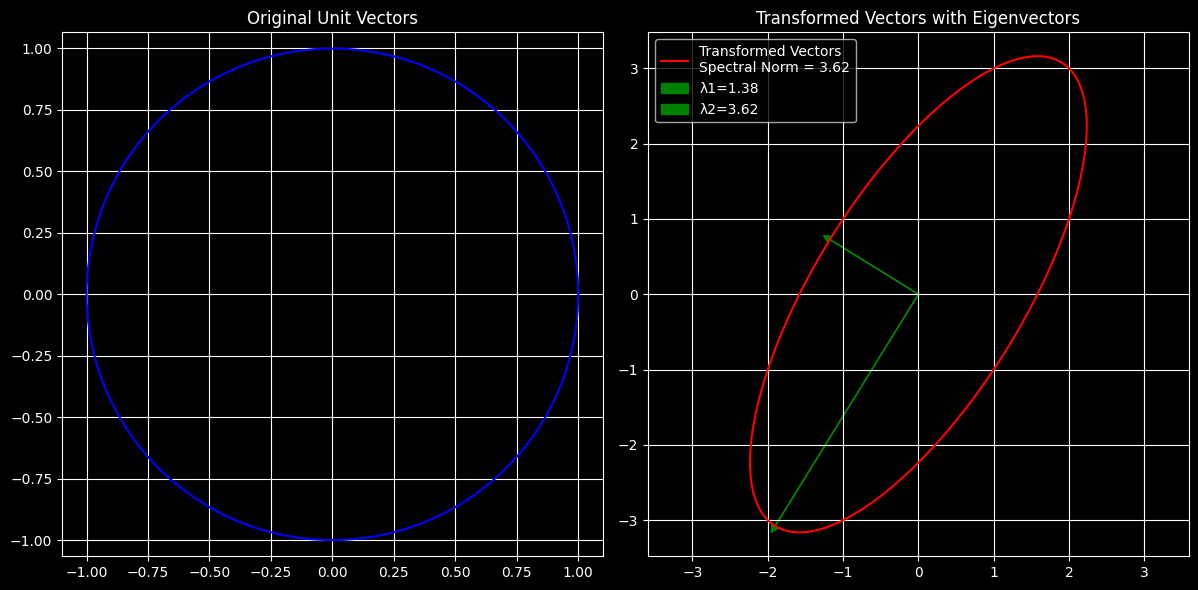

Spectral Norm: 3.62
Maximum Vector Length: 3.62


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_unit_vectors(num_points=100):
    """Generate vectors of unit length in different directions."""
    theta = np.linspace(0, 2*np.pi, num_points)
    x = np.cos(theta)
    y = np.sin(theta)
    return np.vstack((x, y))

def apply_transformation(points, matrix):
    """Apply matrix transformation to points."""
    return np.dot(matrix, points)

def visualize_spectral_norm():
    # Generate unit vectors
    unit_vectors = generate_unit_vectors()
    
    # Define a matrix with known eigenvalues
    A = np.array([[2, 1],
                  [1, 3]])
    
    # Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(A)
    spectral_norm = np.max(np.abs(eigenvalues))
    
    # Transform unit vectors
    transformed_vectors = apply_transformation(unit_vectors, A)
    
    # Calculate lengths of transformed vectors
    transformed_lengths = np.sqrt(np.sum(transformed_vectors**2, axis=0))
    max_length = np.max(transformed_lengths)
    
    # Create visualization
    plt.figure(figsize=(12, 6))
    
    # Plot original unit vectors
    plt.subplot(121)
    plt.plot(unit_vectors[0], unit_vectors[1], 'b-', label='Unit Circle')
    plt.grid(True)
    plt.axis('equal')
    plt.title('Original Unit Vectors')
    
    # Plot transformed vectors
    plt.subplot(122)
    plt.plot(transformed_vectors[0], transformed_vectors[1], 'r-', 
             label=f'Transformed Vectors\nSpectral Norm = {spectral_norm:.2f}')
    
    # Plot eigenvectors scaled by eigenvalues
    for i in range(2):
        scaled_eigenvector = eigenvalues[i] * eigenvectors[:, i]
        plt.arrow(0, 0, scaled_eigenvector[0], scaled_eigenvector[1],
                 head_width=0.1, head_length=0.1, fc='g', ec='g',
                 label=f'λ{i+1}={eigenvalues[i]:.2f}')
    
    plt.grid(True)
    plt.axis('equal')
    plt.title('Transformed Vectors with Eigenvectors')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return spectral_norm, max_length

# Execute visualization and print results
spectral_norm, max_length = visualize_spectral_norm()
print(f"Spectral Norm: {spectral_norm:.2f}")
print(f"Maximum Vector Length: {max_length:.2f}")